In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_synthetic_data(size=100, thickness=1, parabola_a=0.01, 
                            parabola_center=(25, 50, 50), 
                            plane_normal=(1, 0, 0), plane_point=(75, 50, 50)):
    """
    Generate synthetic data with a parabola and a plane.
    
    :param size: Size of the 3D array (size x size x size)
    :param thickness: Thickness of the parabola and plane
    :param parabola_a: Coefficient 'a' in the parabola equation y = ax^2
    :param parabola_center: (x, y, z) center point of the parabola
    :param plane_normal: Normal vector of the plane
    :param plane_point: A point on the plane
    :return: 3D NumPy array with the synthetic data
    """
    # Create a 3D array filled with zeros
    data = np.zeros((size, size, size), dtype=np.float32)
    
    # Create coordinate arrays
    x, y, z = np.meshgrid(np.arange(size), np.arange(size), np.arange(size))
    
    # Generate parabola
    px, py, pz = parabola_center
    parabola_z = parabola_a * ((x - px)**2 + (y - py)**2) + pz
    parabola_mask = np.abs(z - parabola_z) <= thickness/2
    data[parabola_mask] = 1
    
    # Generate plane
    plane_normal = np.array(plane_normal)
    plane_normal = plane_normal / np.linalg.norm(plane_normal)  # Normalize the normal vector
    d = -np.dot(plane_normal, plane_point)
    plane_eq = plane_normal[0]*x + plane_normal[1]*y + plane_normal[2]*z + d
    plane_mask = np.abs(plane_eq) <= thickness/2
    data[plane_mask] = 1
    
    return data

In [3]:
# Parameters
size = 50
thickness = 2
parabola_a = 0.02
loc = 25
parabola_center = (25, 25, 25)  # Center of the parabola (x, y, z)
plane_normal = (0, 0, 1)  # Normal vector of the plane
plane_point = (25, 25, 25)  # A point on the plane

# Generate synthetic data
synthetic_data = generate_synthetic_data(size, thickness, parabola_a, 
                                         parabola_center, plane_normal, plane_point)

In [4]:
import plotly.graph_objects as go

def visualize_3d_binary_data(data):
    # Get the shape of the data
    shape = data.shape
    
    # Create coordinates
    x, y, z = np.mgrid[0:shape[0], 0:shape[1], 0:shape[2]]
    
    # Create the 3D visualization
    fig = go.Figure(data=go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=data.flatten(),
        isomin=0.5,
        isomax=1,
        opacity=0.5,  # Adjust this value to change the transparency
        surface_count=1,
        colorscale='Viridis',
    ))

    fig.update_layout(
        scene=dict(
            xaxis=dict(range=[0, shape[0]], title='X'),
            yaxis=dict(range=[0, shape[1]], title='Y'),
            zaxis=dict(range=[0, shape[2]], title='Z'),
            aspectmode='data'  # Changed to 'data' to respect the actual shape
        ),
        width=700,
        height=700,
        margin=dict(r=20, l=10, b=10, t=10),
        title_text="3D Synthetic Data Visualization (Isosurface)"
    )

    fig.show()

# Assuming synthetic_data and size are defined
visualize_3d_binary_data(synthetic_data)

In [5]:
from helper import *

In [6]:
optimal_meshes = generate_optimal_meshes(synthetic_data)
print(optimal_meshes)

[<trimesh.Trimesh(vertices.shape=(6300, 3), faces.shape=(12110, 3))>]


In [12]:
import pyvista as pv
print(f"PyVista version: {pv.__version__}")

PyVista version: 0.44.1


In [13]:
import pyvista as pv

def trimesh_to_pyvista(trimesh_obj):
    """Convert a Trimesh object to a PyVista PolyData object."""
    vertices = trimesh_obj.vertices
    faces = trimesh_obj.faces
    
    # PyVista expects face arrays to have an additional column 
    # specifying the number of vertices per face (which is always 3 for triangles)
    face_data = np.column_stack((np.full(len(faces), 3), faces))
    face_data = face_data.flatten()

    return pv.PolyData(vertices, face_data)

def visualize_data_and_meshes(synthetic_data, optimal_meshes):
    # Create a PyVista plotter
    plotter = pv.Plotter()
    plotter.set_background('white')

    # Create a grid for the synthetic data
    grid = pv.ImageData()
    grid.dimensions = synthetic_data.shape
    grid.origin = (0, 0, 0)
    grid.spacing = (1, 1, 1)
    
    # Assign the synthetic data to the grid
    grid.point_data["values"] = synthetic_data.flatten(order="F")
    
    # Add volume to plotter
    plotter.add_volume(grid, cmap="viridis", opacity="linear")

    # Add each optimal mesh to the plotter
    for i, mesh in enumerate(optimal_meshes):
        color = plt.cm.Set2(i / len(optimal_meshes))
        pv_mesh = trimesh_to_pyvista(mesh)
        plotter.add_mesh(pv_mesh, color=color[:3], opacity=0.7)

    # Show the plot
    plotter.show()

/Users/jamesdarby/anaconda3/envs/3D_mesh_fitting/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning:

Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.



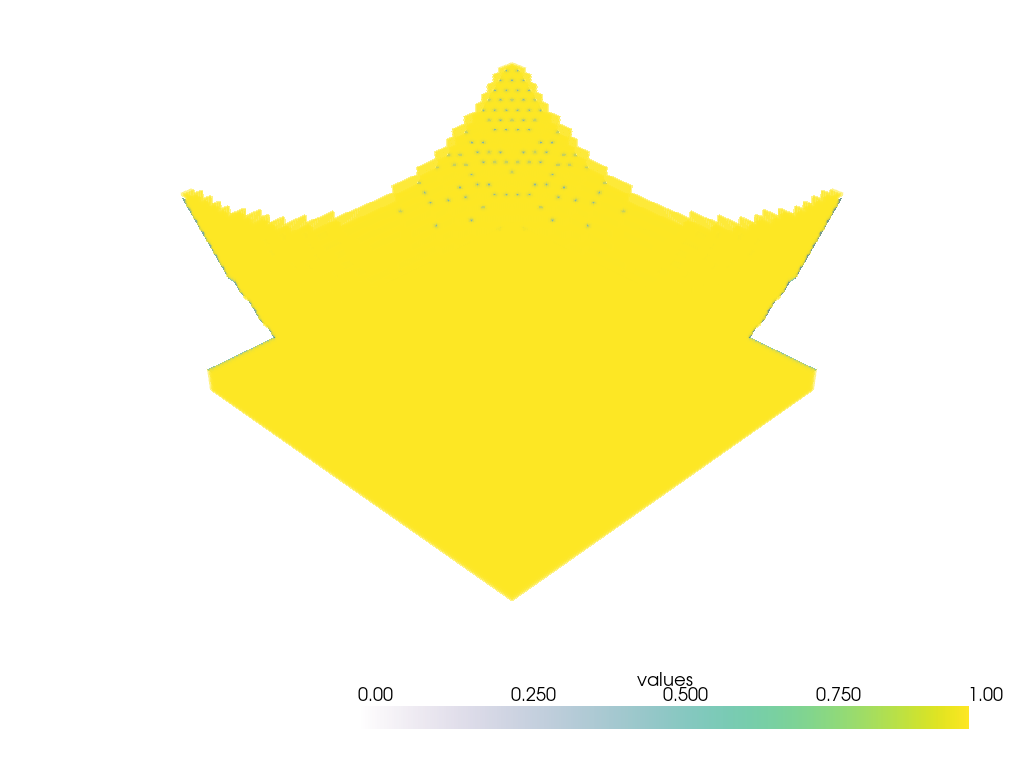

: 

In [14]:
visualize_data_and_meshes(synthetic_data, optimal_meshes)